In [37]:
#It is safe to ignore this for now, it just sets some parameters for plots
from matplotlib import rc
rc('lines', linewidth=5, markersize=10)
rc('axes', titlesize=20, labelsize=20)
rc('xtick', labelsize=16)
rc('ytick', labelsize=16)
rc('figure', figsize=[7,4])

# Python Examples for Numerical Analysis

This notebook contains implementations of some simple algorithms from numerical analysis. It is intended as a reference for students in Math 651.

## Boilerplate

Most scripts that you write for this class will begin by importing the numpy module, a collection of tools for numerics. You will probably also want matplotlib.pyplot, a library of functions for producing plots. 

In [38]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

If you import these modules with the commands above, you will access their contents with the prefixes `np.` and `plt.` For example, the number $\pi$ comes with the numpy module, and to get it you write

In [39]:
np.pi

3.141592653589793

On the other hand, `from sklearn.linear_model import LinearRegression` imports only the class `LinearRegression` from the sklearn module, and this class is available without any prefix.

## Numpy Arrays

The array is the most useful data structure in scientific computing. If you are not familiar with arrays, think of them as vectors, matrices, or tensors whose entries are floating point numbers. For example, the following command defines something like the vector
\begin{equation*}
v= \begin{pmatrix}
1 \\
2 \\
\end{pmatrix}.
\end{equation*}

In [40]:
v=np.array([1,2])

**Numpy arrays are indexed from `0`**, and the i'th element of an array is accessed like `v[i]`:

In [41]:
v[0]

1

In [42]:
v[1]

2

The index of an array of `N` elements cannot exceed `N-1`. 

In [43]:
v[2]

IndexError: index 2 is out of bounds for axis 0 with size 2

However, array indices can be negative. Here, `v[-1]` is the last element of `v`, `v[-2]` is the second to last element, etc.

In [44]:
v[-1]

2

#### Lists vs Arrays

In the example above, `[1,2]` is a **list**. The function `np.array()` converts the list to a numpy **array**. The list and array data structures are similar, but not interchangeable. For now, you should use exclusively arrays. Code written with arrays is more efficient than code with lists. (What really distinguishes the two structures is that arrays are stored contiguously in memory and all entries have the same type. Lists need not have either property. Thus, it is more efficient to loop over arrays but easier to change the size of a list.) 

#### Multi-dimensional Arrays

Arrays can have two or more dimensions, in which case they behave like matrices or tensors. To define a 2-dimensional array, pass the function `np.array()` a list of rows:

In [45]:
M=np.array([[1,2],[6,7]])
M

array([[1, 2],
       [6, 7]])

Here, `[[1,2],[6,7]]` is simply a list whose entries are are the rows of $M$. (Of course, the rows of $M$ are themselves lists.)

To access the entries of a multi-dimensional array, use expressions like `M[i,j]`. 

In [46]:
M[0,1]

2

#### Matrix Multiplication

In python, **one does not use `*` to multiply matrices. Instead, use the function `np.dot`.** For example:

In [47]:
Mv=np.dot(M,v)
Mv

array([ 5, 20])

**This is very tricky because `*` does act on arrays, but it doesn't do the same thing as matrix multiplication!**

In [48]:
M*v

array([[ 1,  4],
       [ 6, 14]])

Note that `M*v` is the same as $M \rm{diag}(v)$.

Every array has a shape which is a python tuple. (For our purposes, a tuple is a list enclosed in round instead of square brackets.)

In [49]:
M.shape

(2, 2)

In [50]:
v.shape

(2,)

Note well the shape of `v`. `(2,)` is the shape of a one-dimensional array of length 2, `(2,1)` is the shape of a column vector (2-d array with one column) of length 2, and `(1,2)` is the shape of a row vector (2-d array with one row) of length 2. **Some functions will only accept a one-dimensional array, some only a row vector, and some only a column vector. See the example below concerning `LinearRegression.fit`** 

#### Initializing Arrays

It is often convenient to make an array of a certain shape consisting of all zeros or all ones. Here is how to do it:

In [51]:
np.zeros((2,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [52]:
np.ones((3,))

array([1., 1., 1.])

#### Slicing

Often one wants to extract part of an array, e.g. one row, every third element, the last half. Here are some examples:

In [53]:
a=np.array([3,4,5,6,7])

`a[m:n]` gives the m'th through the (n-1)'st elements of a.

In [54]:
a[1:3]

array([4, 5])

Note well that **`a[m:n]` does not include a[n]!**

If you would like every `k`'th element of an array with index between `m` and `n`, use `a[m:n:k]`.

In [55]:
b=np.array([3,4,5,6,7,8,9,10,11,12,13,14,15])
b[0:13:3]

array([ 3,  6,  9, 12, 15])

It is also easy to the `i`'th row (`a[i,:]`) or `i`'th column (`a[:,i]`) of an array.

In [56]:
c=np.array([[1,2],[3,4],[5,6]])
c

array([[1, 2],
       [3, 4],
       [5, 6]])

In [57]:
c[:,0]

array([1, 3, 5])

In [58]:
c[2,:]

array([5, 6])

## Quadrature

We perform a convergence study for the composite midpoint rule quadrature (uniform grid), which is given by the formula 

\begin{align*}
M^N_{[a,b]}(f) &= h \sum_{n=0}^{N-1} f \left ( a+ \left (n+\frac12 \right )h \right)\\ 
h &= \frac{b-a}{N}.
\end{align*}

First, we define a sample function to take the place of $f$ above. 

In [59]:
def g(x):
    return np.exp(-x**2)

The code above defines
\begin{equation*}
    g(x) = \exp(-x^2).
\end{equation*}

#### Notes
   * The indentation in the definition of a function is required! The function definition ends when the code goes back to the left margin. That is, python has **syntactically significant white space**.
   * The name of the exponential function is prefixed by `np.`---see the 'Boilerplate' section above.
   * **VERY IMPORTANT:** Use  `**` to compute powers, not caret `^`. (In python, `^` means bitwise XOR.)
   
We now implement the quadrature $M^N_{[a,b]}$.

In [75]:
def M(f,a,b,N):
    """
    Compute composite midpoint rule quadrature defined above.
    
    Inputs
    ------
       * f, function, the integrand
       * a, float, the left endpoint of the integral
       * b, float, the right endpoint of the integral
       * N, natural number, the number of grid points
       
    Output
    ------
       * float, composite midpoint quadrature estimate
    """
    h=(b-a)/N
    M=0.0
    for n in range(0,N):
       M=M+f(a+(n+0.5)*h)
    M=h*M
    return M

#### Notes
   * In general, python comments begin with `#`. Longer comments, like the docstrings that are sometimes part of a function definition, are enclosed in `"""`. 
   * Python docstrings should be written in markdown. (Don't worry if you don't know what that means or how to do it.)
   * The expression `range(0,N)` in the for loop produces a list of numbers from 0 up to N-1. `range(0,N)` is like the slice `a[0:N]` in that **N is not in `range(0,N)`**. In python, for loops are always expressed as loops over lists like `range(0,N)`.
   * M takes the integrand f as an argument. That is, M is a **second-order function**, or function of functions. This is convenient, since one can use the same quadrature function to evaluate quadratures of many different integrands. Most implementations of numerical methods will be second-order functions of this type. 
   * In numerical analysis, it is usually best if the code resembles the mathematical description of the algorithm as closely as possible. In this case, observe that I have used the same variable names in both the mathematical presentation of the algorithm and its implementation. 

We perform a convergence study to test that the algorithm behaves as expected. We choose $a=0$, $b=1$, and $N \in \{2^k; k=1, \dots, 14\}$ for the study. 

In [67]:
a=0.0
b=1.0
Ns=np.array([2**k for k in range(0,15)])

#### Notes
   * `[2**k for k in range(0,15)]` is called a list comprehension. It is more or less equivalent to
   ```
   Ns=[] #initialize empty list
   for k in range(0,15):
       Ns.append(2**k) #add 2**k to the list Ns as the last element
   ```
   * `Ns=np.array([2**k for k in range(0,15)])` is more or less equivalent to 
   ```
   Ns=np.zeros(15) #initialize 15 element numpy array with all entries equal to zero
   for k in range(0,15):
       Ns[k]=2**k
   ```

We want to see how the error of the quadrature depends on $N$. To be precise, we would like to compute a plot showing $\log_{10}(N)$ vs. $\log_{10}(\rm{err}(N))$, where 
\begin{equation*}
   \rm{err}(N) = M^N_{[0,1]}(g) - \int_0^1 g(x) \, dx.
\end{equation*}   

Of course, in this case, we do not know the exact integral, so we use the best approximation $M^{2^{14}}_{[0,1]}(g)$ instead when computing the error. 

In [68]:
Ms=np.array([M(g,a,b,N) for N in Ns])
err=np.array([np.abs(I-Ms[-1]) for I in Ms[0:-1]])

#### Notes
   *  Here, we have some list comprehensions that loop over lists other than `range(m,n)`. In python, you can loop over pretty much any list or array. 
   * `np.abs` is the absolute value function
   * Recall that `Ms[-1]` is the last element of `Ms`, `Ms[-2]` is second to last, etc.
   * One can slice with negative indices. Here, `Ms[0:-1]` consists of all elements of `Ms` except the last.
  

Finally, we plot the results with appropriate labels and a title.

Text(0.5, 1.0, 'Quadrature Error vs. Grid Size for the Midpoint Rule')

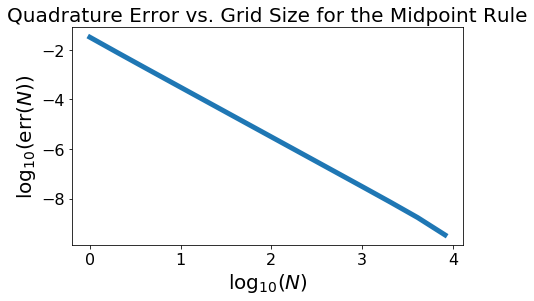

In [69]:
plt.plot(np.log10(Ns[0:-1]),np.log10(err))
plt.xlabel(r'$\log_{10}(N)$')
plt.ylabel(r'$\log_{10}({\rm err}(N))$')
plt.title(r'Quadrature Error vs. Grid Size for the Midpoint Rule')

#### Notes
   * Many functions like np.log10 can act on arrays as well as numbers. 
   * The argument of plt.xlabel should be a **string**--in python you make a string by enclosing some characters in tick marks. 
   * Pyplot functions like plt.xlabel interpret a string as Latex if it is preceded by `r`.

We should probably check to see whether the slope of the line above is close to the slope predicted by theory, which is $m=-2$.

In [70]:
fit_line=LinearRegression().fit(np.log10(Ns[0:-1]).reshape(-1,1),np.log10(err))
print('Slope of least square linear fit is m={0:1.2f}'.format(fit_line.coef_[0]))

Slope of least square linear fit is m=-2.02


#### Notes
   * Technically, `LinearRegression` is a class and `fit` is one of its methods, but for now you can imagine that `LinearRegression().fit` is a function with an odd name. 
   * The function `LinearRegression().fit` takes two arguments: `X` and `y`, the independent and dependent variables. It is designed to handle the case where the independent variable is multi-dimensional, so `X` must be a two-dimensional array! (Each row `X[i,:]` of `X` is a single value of the multi-dimensional independent variable. ) The array `np.log10(Ns[0:-1]).reshape(-1,1)` is a version of `np.log10(Ns[0:-1])` with shape `(13,1)` instead of `(13,)`. This can be a bit technical...but see the error message below to confirm that the fit won't work unless we reshape the array.
   * `LinearRegression().fit` returns a one-dimensional array of regression coefficients. In our case, the array contains only one element, but we still have to extract that one element. Otherwise, the format method will give us an error, since it is expecting a float not an array of floats containing a single element. That is why I have `fit_line.coef_[0]` above instead of just `fit_line.coef_`.

Here is the error from `LinearRegression().fit` if you give inputs with the wrong number of dimensions.

In [65]:
fit_line=LinearRegression().fit(np.log10(Ns[0:-1]),np.log10(err))

ValueError: Expected 2D array, got 1D array instead:
array=[0.         0.30103    0.60205999 0.90308999 1.20411998 1.50514998
 1.80617997 2.10720997 2.40823997 2.70926996 3.01029996 3.31132995
 3.61235995 3.91338994].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Notice that since scikit-learn is a well written piece of software, it tells you what is wrong with your arguments and what to do about it. 

Now here is the error you get from `format` if you pass an array with one element instead of a scalar:

In [71]:
print('Slope of least square linear fit is m={0:1.2f}'.format(fit_line.coef_))

TypeError: unsupported format string passed to numpy.ndarray.__format__

I guess this might be harder to debug, since the message is not as instructive. But it at least tells you that you have passed `format()` an argument of the wrong type.